I will explain side by side 
so to make it easy for myself

In [3]:
#importing the essential packages
import librosa  #for audio processing
%matplotlib inline 
import matplotlib.pyplot as plt #for plotting
import librosa.display #for displaying wav files
import numpy #for numerical calculations
import scipy #for scitific calculations
import IPython.display as ipd #for dispalying audio files

In [4]:
#Typically expressed in samples per second, or hertz (Hz),
#the rate at which samples of an analog signal are taken in order to be converted into digital form.
x,sr=librosa.load('Vid-2(1).wav') #loads as floating point time series#so it becomes a audio array

In [5]:
x#the audio array

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [6]:
sr #the sampling rate

22050

In [7]:
x[34000] #if you want to print any particular position value in array

0.0084361825

In [8]:
print(x.shape,sr)#length of audio array and sampling rate
librosa.get_duration(x, sr) #length of the audio files(in sec)

(69696,) 22050


3.1608163265306124

In [9]:
ipd.Audio('Vid-2(1).wav') # load a local WAV file

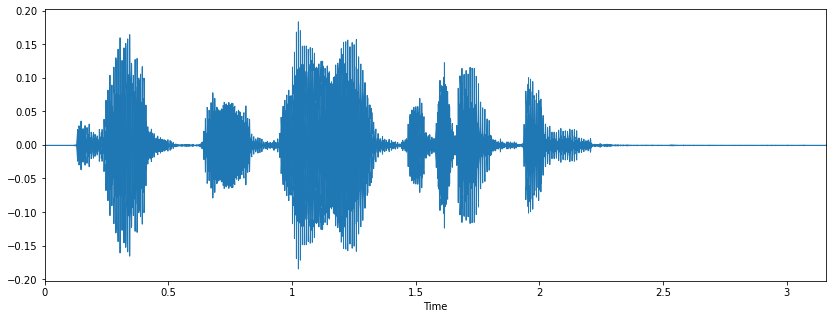

In [10]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000)
#in this we plot audio array vs time#plot amplitude envelope of a waveform.

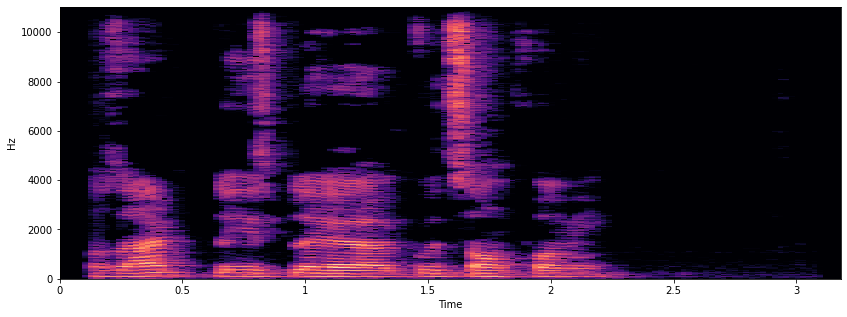

In [11]:
X = librosa.stft(x) 
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [12]:
#Short time Energy
hop_length = 256
frame_length = 512

energy = numpy.array([
    sum(abs(x[i:i+frame_length]**2))
    for i in range(0, len(x), hop_length)
])

energy.shape


(273,)

In [13]:
#claculating RMSE using Librosa.feature.rmse
rmse = librosa.feature.rmse(x, frame_length=frame_length, hop_length=hop_length, center=True)
rmse.shape

(1, 273)

In [14]:
rmse = rmse[0]

In [15]:
frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
t.show()

AttributeError: ignored

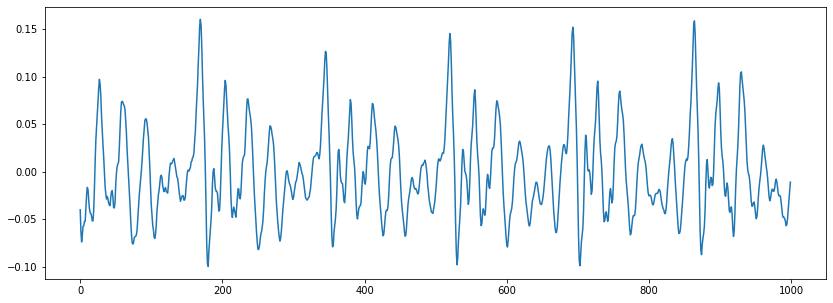

In [16]:
n0 = 6500
n1 = 7500
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])


In [17]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)

In [18]:
zero_crossings.shape

(1000,)

In [19]:
print(sum(zero_crossings))

68


In [20]:
zcrs = librosa.feature.zero_crossing_rate(x)
print(zcrs.shape)

(1, 137)


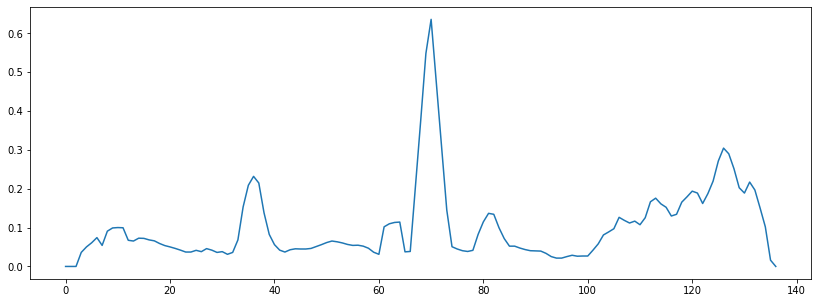

In [21]:
plt.figure(figsize=(14, 5))
plt.plot(zcrs[0])

(-0.0001, 0.0001)

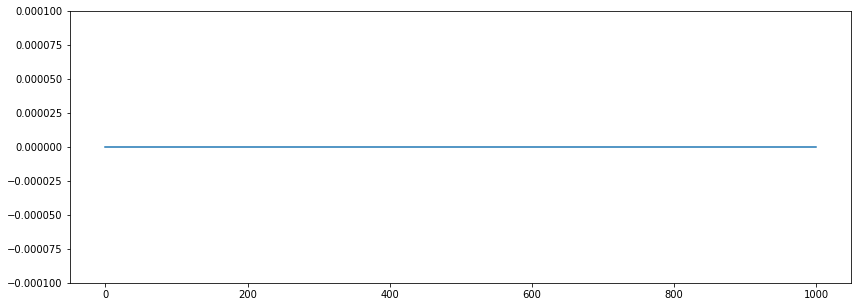

In [22]:
plt.figure(figsize=(14, 5))
plt.plot(x[:1000])
plt.ylim(-0.0001, 0.0001)

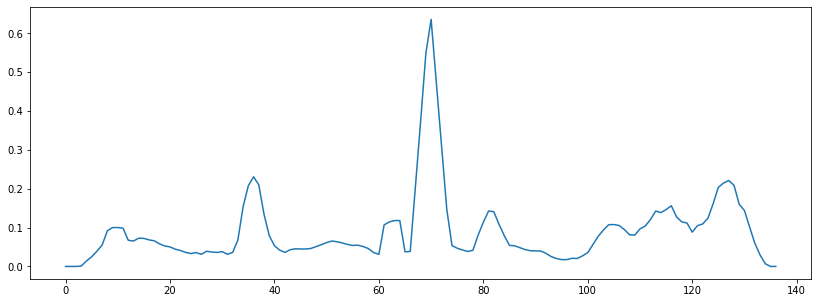

In [23]:
zcrs = librosa.feature.zero_crossing_rate(x + 0.0001)
plt.figure(figsize=(14, 5))
plt.plot(zcrs[0])

In [24]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(137,)

In [25]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

In [26]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

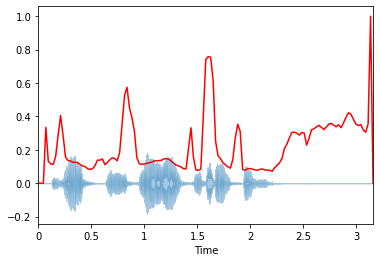

In [27]:
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r') # normalize for visualization purposes


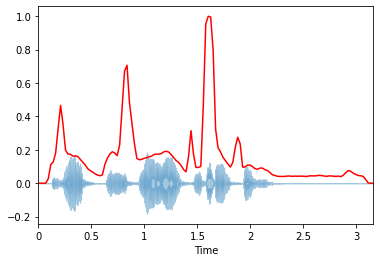

In [28]:
spectral_centroids = librosa.feature.spectral_centroid(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r') # normalize for visualization purposes

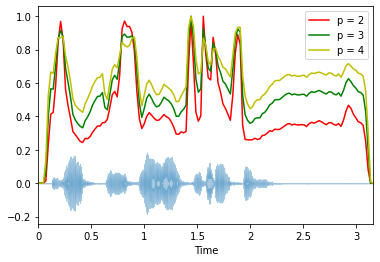

In [29]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

In [30]:
spectral_contrast = librosa.feature.spectral_contrast(x, sr=sr)
spectral_contrast.shape

(7, 137)

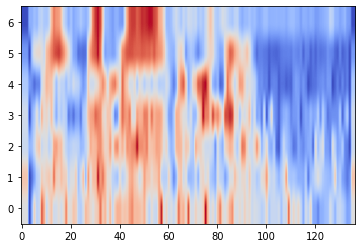

In [31]:
plt.imshow(normalize(spectral_contrast, axis=1), aspect='auto', origin='lower', cmap='coolwarm')


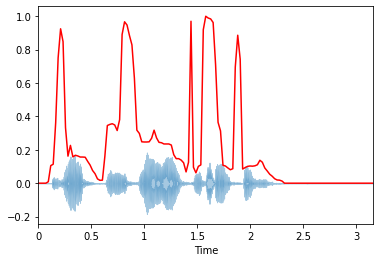

In [32]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

In [33]:
fmin = librosa.midi_to_hz(36)
hop_length = 512
C = librosa.cqt(x, sr=sr, fmin=fmin, n_bins=72, hop_length=hop_length)

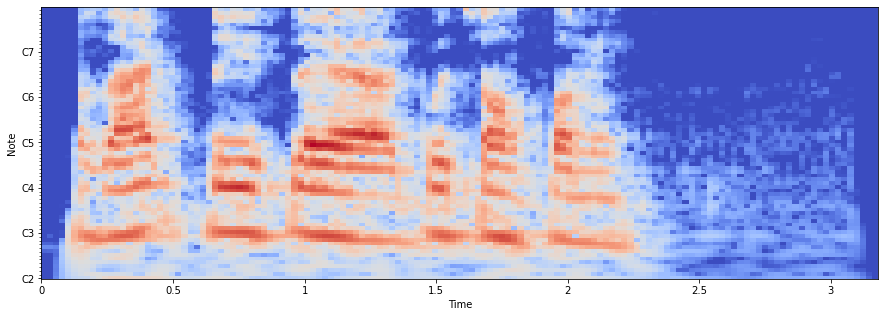

In [34]:
logC = librosa.amplitude_to_db(numpy.abs(C))
plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')

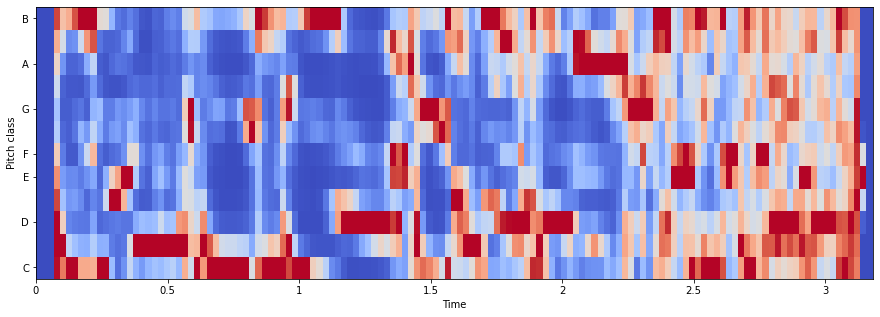

In [35]:
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

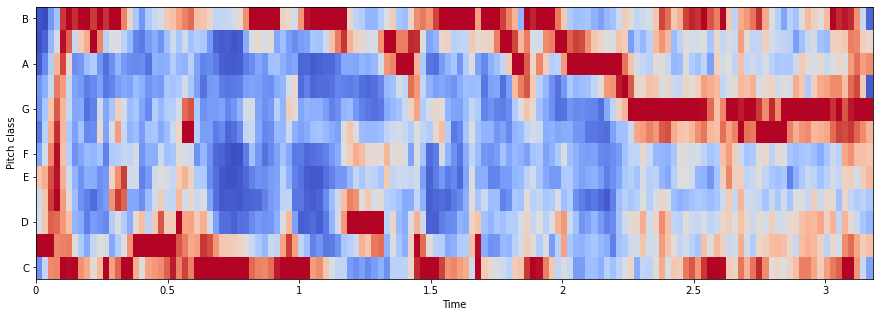

In [36]:
chromagram = librosa.feature.chroma_cqt(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

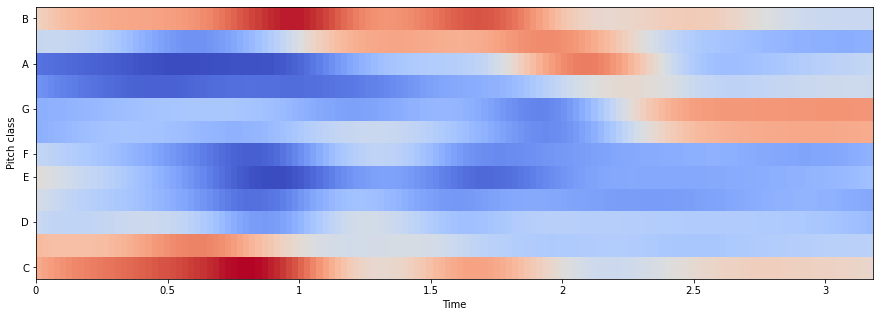

In [37]:

chromagram = librosa.feature.chroma_cens(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [38]:
X = scipy.fft(x)
X_mag = numpy.absolute(X)
f = numpy.linspace(0, sr, len(X_mag)) # frequency variable

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Frequency (Hz)')

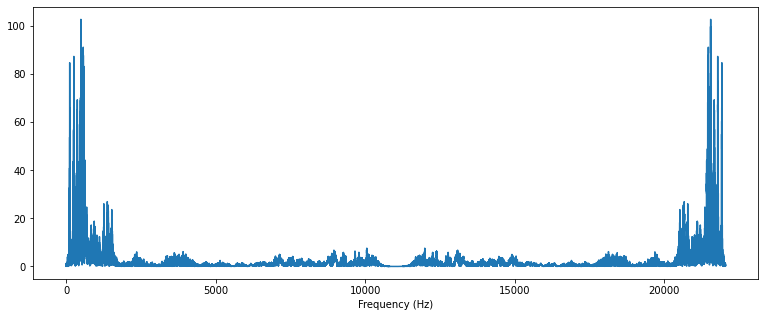

In [39]:
plt.figure(figsize=(13, 5))
plt.plot(f, X_mag) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

Text(0.5, 0, 'Frequency (Hz)')

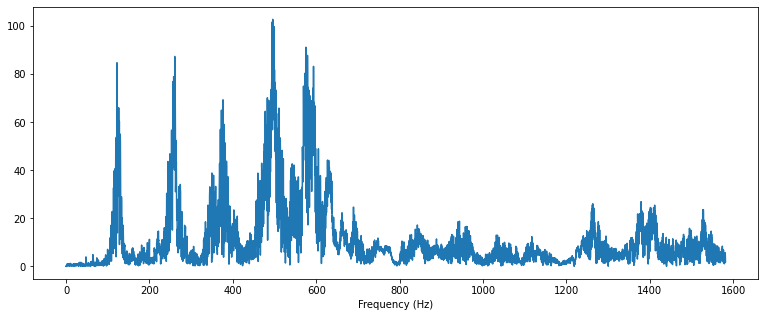

In [40]:
plt.figure(figsize=(13, 5))
plt.plot(f[:5000], X_mag[:5000])
plt.xlabel('Frequency (Hz)')